## Instalação dos pacotes necessários

In [60]:
!pip install rapidfuzz
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip




### Instalamos 4 pacotes:
 1. ***Rapidfuzz*** para realizarmos o fuzzy match de strings de uma coluna de arquivos CSV e uma
    string digitada pelo usuário.
 2. ***Pandas*** para criação dos dataframes e plotagem de alguns gráficos
 3. ***Matplotlib*** e seaborn para plotagem de gráficos.


## Importação dos módulos dos pacotes a serem utilizados para comparação:

In [61]:
import csv
import os
from rapidfuzz import fuzz
from rapidfuzz.process import extract



### Importamos módulos:
 1. ***csv*** para utilizarmos na leituras dos CSVs pelo python.
 2. ***os*** para pegarmos o caminho dos CSVs.
 3. ***rapidfuzz*** como ***fuzz*** e ***rapidfuzz.process*** como ***extract*** para realizar o fuzzy match das strings.


## Definição da função de leitura de CSVs

In [62]:
def read_csv(csv_path, delimiter_char):
    with open(csv_path, mode='r',encoding='utf-8-sig') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=delimiter_char)
        line_count = 0
        wanted_columns = []
        for row in csv_reader:

            if line_count == 0:
                columns_names = delimiter_char.join(row).split(delimiter_char)
                line_count += 1

            data={}
            for column_name in columns_names: 
                data[column_name]=row[column_name]
            wanted_columns.append(data)
            line_count += 1
        
        return wanted_columns



### Funcionamento da função de leitura de CSV:
Nesta função recebemos o caminho do arquivo CSV a ser lido e seu delimitador, isto é o que separa os componentes do CSV (, - _ ; \t |), após isso separamos os headers/títulos de colunas que são sempre as primeiras linhas e concatenamos eles com seus devidos valores em objetos JSON.


## Definição da string e parâmetros a serem utilizados no fuzzy match:

In [63]:
product_search_name = "bala halls"
search_accuracy = 60
search_result_limit = 5


Aqui o usuário irá digitar o nome do produto que irá ser buscado nos CSVs, a acurácia que ele deseja e quantos resultados serão retornados.
No exemplo acima:

    product_search_name  =  "bala halls"
    search_accuracy  =  60
    search_result_limit  =  5

O produto a ser buscado será "bala halls" a acurácia será se 60%, isto é, o match deverá ser de no mínimo 60% (0.6) e serão retornados os top 5 resultados desta pesquisa.


## Execução da função de Fuzzy Match de string e retorno de arrays de resultados:

In [64]:
paths = [os.path.abspath(os.path.join('searched_csvs', p)) for p in os.listdir('searched_csvs')]
array_complete = []
array_matches = []
array_results = []

for path in paths:
    csv_name= path.split('/')[-1]
    secondary_comparer=read_csv(path,';')

    result_match=None
    score1 = extract(product_search_name, [d['ProductName'] for d in secondary_comparer], scorer=fuzz.QRatio,limit=search_result_limit, score_cutoff=search_accuracy)
    
    if score1:
        array_inside=[]
        for score in score1:
            product_name = score[0]
            brand=secondary_comparer[score[2]]['Brand']
            match_score =round(score[1],2)

            obj_original={'Product_Name': product_name,'Brand':brand,'Match_Score':match_score}
            array_inside.append(obj_original)

            obj_result = dict(obj_original)
            obj_result["Searched_CSV"]=csv_name
            array_results.append(obj_result)

        result_match=array_inside
        obj_matches={'Searched_CSV':csv_name,'Match_Result':len(result_match)}
        array_matches.append(obj_matches)

    obj_result={'Searched_CSV':path.split('/')[-1],'Match_Result':result_match}
    array_complete.append(obj_result)


  
  

### Funcionamento da função de Fuzzy Match:

Esta função irá iterar em um for sobre os caminhos de todos os CSVs presentes na pasta *searched_csvs*, assim ele irá executar a função **extract** vinda da importação do módulo ***rapidfuzz.process*** com um laço for dentro de uma lambda function iterando por todos os resultados vindos da coluna de *ProductName* dos CSVs lidos pela função **read_csv** definida anteriormente.

Ainda dentro da função **extract** utilizamos o metódo de score da lógica fuzzy de QRatio, esta lógica faz com que haja um pré processamento e normalização das strings a serem comparadas, neste caso as strings da coluna *ProductName* e da variável *product_search_name* (definida pelo usuário).

Utiliza-se também a quantidade de limite de resultados a serem exibidos e o score mínimo de corte, definido pelo usuário anteriormente como a variável *search_result_limit* e *search_accuracy* respectivamente.

Assim no laço for que é criados no caso de um score fuzzy existir contendo todos os pré requisitos são criados 3 arrays que iremos explicar abaixo.

## Arrays criados:

In [65]:
print(f'Resultado do Fuzzy String Match de {product_search_name}:')
array_complete

Resultado do Fuzzy String Match de bala halls:


[{'Searched_CSV': 'DADOS_ABERTOS_ALIMENTO.csv',
  'Match_Result': [{'Product_Name': 'BALA RECHEADA',
    'Brand': 'PAN PRODUTOS ALIMENT�CIOS NACIONAIS S/A',
    'Match_Score': 60.87}]},
 {'Searched_CSV': 'CASA_CONSTRUCAO_E_JARDINAGEM.csv', 'Match_Result': None},
 {'Searched_CSV': 'VETERINARIAS_E_PET_SHOPS.csv', 'Match_Result': None},
 {'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv',
  'Match_Result': [{'Product_Name': 'BALA HALLS MENTA',
    'Brand': 'MONDELEZ',
    'Match_Score': 76.92},
   {'Product_Name': 'BALA HALLS CEREJA',
    'Brand': 'MONDELEZ',
    'Match_Score': 74.07},
   {'Product_Name': 'BALA HALLS MENTA 28G',
    'Brand': 'MONDELEZ',
    'Match_Score': 66.67},
   {'Product_Name': 'HALLS', 'Brand': '', 'Match_Score': 66.67},
   {'Product_Name': 'BALA HALLS CEREJA 28G',
    'Brand': 'MONDELEZ',
    'Match_Score': 64.52}]},
 {'Searched_CSV': 'COMERCIO_VAREJISTA_OU_ESPECIALIZADO.csv',
  'Match_Result': None},
 {'Searched_CSV': 'MERCADOS_EMPORIOS_E_PADARIAS.csv', 'Match_R

Este primeiro array de objetos JSON, *array_complete*, mostra os resultados encontrados em todos os CSVs, sendo aqueles que não foram encontrados preenchidos na key *Match_Result* como *None*.

In [66]:
print('Número de Match por CSV com Match_Result diferente de None:')
array_matches

Número de Match por CSV com Match_Result diferente de None:


[{'Searched_CSV': 'DADOS_ABERTOS_ALIMENTO.csv', 'Match_Result': 1},
 {'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv', 'Match_Result': 5}]

Este segundo array de objetos JSON, *array_matches*, mostra os resultados em número inteiro da quantidade de palavras semelhantes encontradas nos CSVs que encontraram de falto algo, omitindo aqueles com resultado de *Match_Result = None*.

In [67]:
print('Array final com Product_Name, Brand, Match_Score e Searched_CSV:')
array_results

Array final com Product_Name, Brand, Match_Score e Searched_CSV:


[{'Product_Name': 'BALA RECHEADA',
  'Brand': 'PAN PRODUTOS ALIMENT�CIOS NACIONAIS S/A',
  'Match_Score': 60.87,
  'Searched_CSV': 'DADOS_ABERTOS_ALIMENTO.csv'},
 {'Product_Name': 'BALA HALLS MENTA',
  'Brand': 'MONDELEZ',
  'Match_Score': 76.92,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'},
 {'Product_Name': 'BALA HALLS CEREJA',
  'Brand': 'MONDELEZ',
  'Match_Score': 74.07,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'},
 {'Product_Name': 'BALA HALLS MENTA 28G',
  'Brand': 'MONDELEZ',
  'Match_Score': 66.67,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'},
 {'Product_Name': 'HALLS',
  'Brand': '',
  'Match_Score': 66.67,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'},
 {'Product_Name': 'BALA HALLS CEREJA 28G',
  'Brand': 'MONDELEZ',
  'Match_Score': 64.52,
  'Searched_CSV': 'BANCAS_QUIOSQUES_E_PAPELARIAS.csv'}]

Este terceiro e último array de objetos JSON, *array_matches*, mostra um resultado semelhante ao *array_complete* porém omitindo aqueles com resultado de *Match_Result = None* e adicionando a key nova de *Searched_CSV* com o valor do CSV em que a palavra foi encontrada.

## Criação dos Panda Dataframes:

In [68]:
import pandas as pd

Aqui importamos o módulo do pandas como pd para criarmos os dataframes a serem utilizados para plotagem de gráficos.

In [69]:
df_match = pd.DataFrame.from_records(array_matches)

In [70]:
df_match.columns

Index(['Searched_CSV', 'Match_Result'], dtype='object')

In [71]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Searched_CSV  2 non-null      object
 1   Match_Result  2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


In [72]:
df_match.head()

,Searched_CSV,Match_Result
0,DADOS_ABERTOS_ALIMENTO.csv,1
1,BANCAS_QUIOSQUES_E_PAPELARIAS.csv,5


In [73]:
df_match.describe()

,Match_Result
count,2.000000
mean,3.000000
std,2.828427
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Dataframe *df_match* criado a partir de *array_matches* além da exibição das columns, head, info, head e describe do dataframe.

In [74]:
df_result = pd.DataFrame.from_records(array_results)

In [75]:
df_result.columns

Index(['Product_Name', 'Brand', 'Match_Score', 'Searched_CSV'], dtype='object')

In [76]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_Name  6 non-null      object 
 1   Brand         6 non-null      object 
 2   Match_Score   6 non-null      float64
 3   Searched_CSV  6 non-null      object 
dtypes: float64(1), object(3)
memory usage: 320.0+ bytes


In [77]:
df_result.head()

,Product_Name,Brand,Match_Score,Searched_CSV
0,BALA RECHEADA,PAN PRODUTOS ALIMENT�CIOS NACIONAIS S/A,60.87,DADOS_ABERTOS_ALIMENTO.csv
1,BALA HALLS MENTA,MONDELEZ,76.92,BANCAS_QUIOSQUES_E_PAPELARIAS.csv
2,BALA HALLS CEREJA,MONDELEZ,74.07,BANCAS_QUIOSQUES_E_PAPELARIAS.csv
3,BALA HALLS MENTA 28G,MONDELEZ,66.67,BANCAS_QUIOSQUES_E_PAPELARIAS.csv
4,HALLS,,66.67,BANCAS_QUIOSQUES_E_PAPELARIAS.csv


In [78]:
df_result.describe()

,Match_Score
count,6.000000
mean,68.286667
std,6.039923
min,60.870000
25%,65.057500
50%,66.670000
75%,72.220000
max,76.920000


Dataframe *df_result* criado a partir de *array_results* além da exibição das columns, head, info, head e describe do dataframe.

## Plotagem de gráficos

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

### Importamos módulos:
 1. ***seaborn*** como ***sns***.
 2. ***matplotlib.pyplot*** como ***plt***.

### Gráfico relacionado ao dataframe df_matches:

<AxesSubplot: ylabel='Match_Result'>

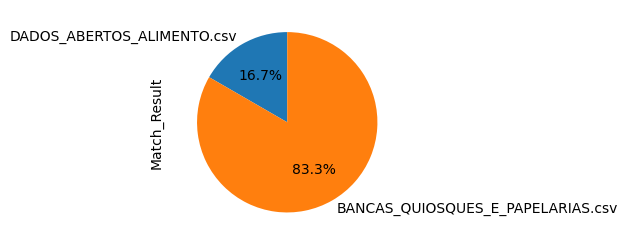

In [80]:
graphic_match = plt.subplot(121, aspect='equal')
df_match.plot(kind='pie', y = 'Match_Result', ax=graphic_match, autopct='%1.1f%%',startangle=90,labels=df_match['Searched_CSV'], legend = False)

Aqui exibimos um gráfico do tipo Pizza representando a porcentagem parcial de palavras encontradas em cada CSV em relação a quantidade total.

Será que o CSV que encontrou mais palavras é o que possui as palavras mais próximas aquelas digitadas pelo usuário?

### Gráficos relacionados ao dataframe df_result:

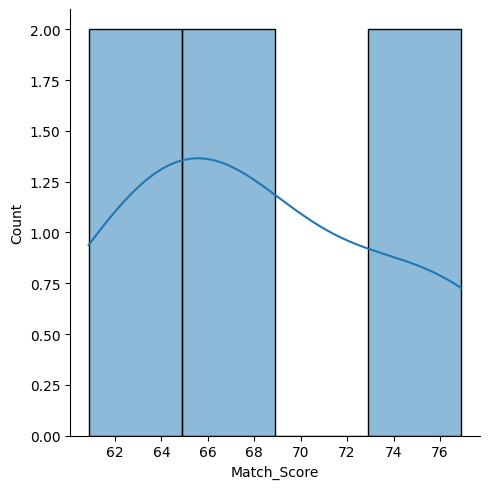

In [81]:
sns.displot(df_result['Match_Score'],kde=True)

Aqui exibimos um histograma da quantidade de palavras em relação ao *Match_Score*, podemos ter muitas palavras com *Match_Score* próximos ao valor de corte (60) e poucos próximo a um *Match_Score* ideal (75+).

<AxesSubplot: xlabel='Searched_CSV', ylabel='Match_Score'>

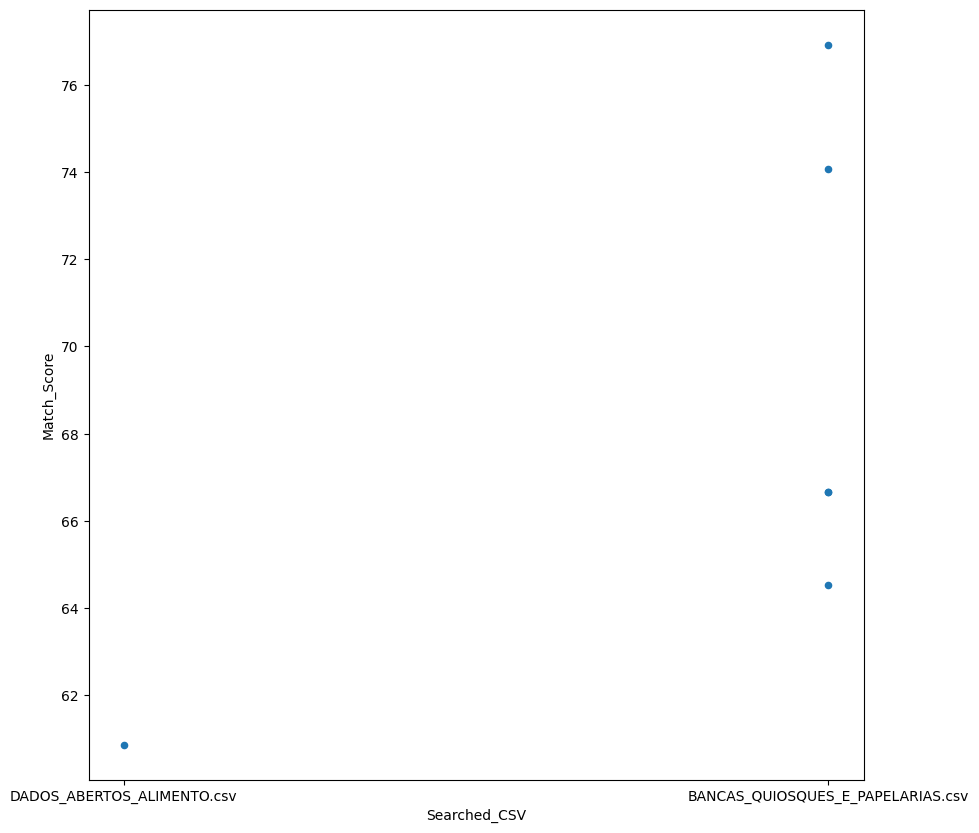

In [82]:
df_result.plot.scatter(x="Searched_CSV", y="Match_Score",figsize=(10, 10),colormap='viridis')

Aqui exibimos um gráfico de dispersão demonstrando por *Searched_CSV* qual o *Match_Score* alcançado, complementando o gráfico anterior demonstrando em que CSV encontramos o *Match_Score* mais próximo ao ideal.

In [83]:
df_result_pivot = df_result.pivot_table(index='Product_Name', columns=['Searched_CSV','Brand'], values='Match_Score',fill_value=0)

Aqui definimos uma pivotagem para o dataframe *df_result*, isto é necessário visto que temos apenas uma coluna com valor em números e as demais com valores em texto.

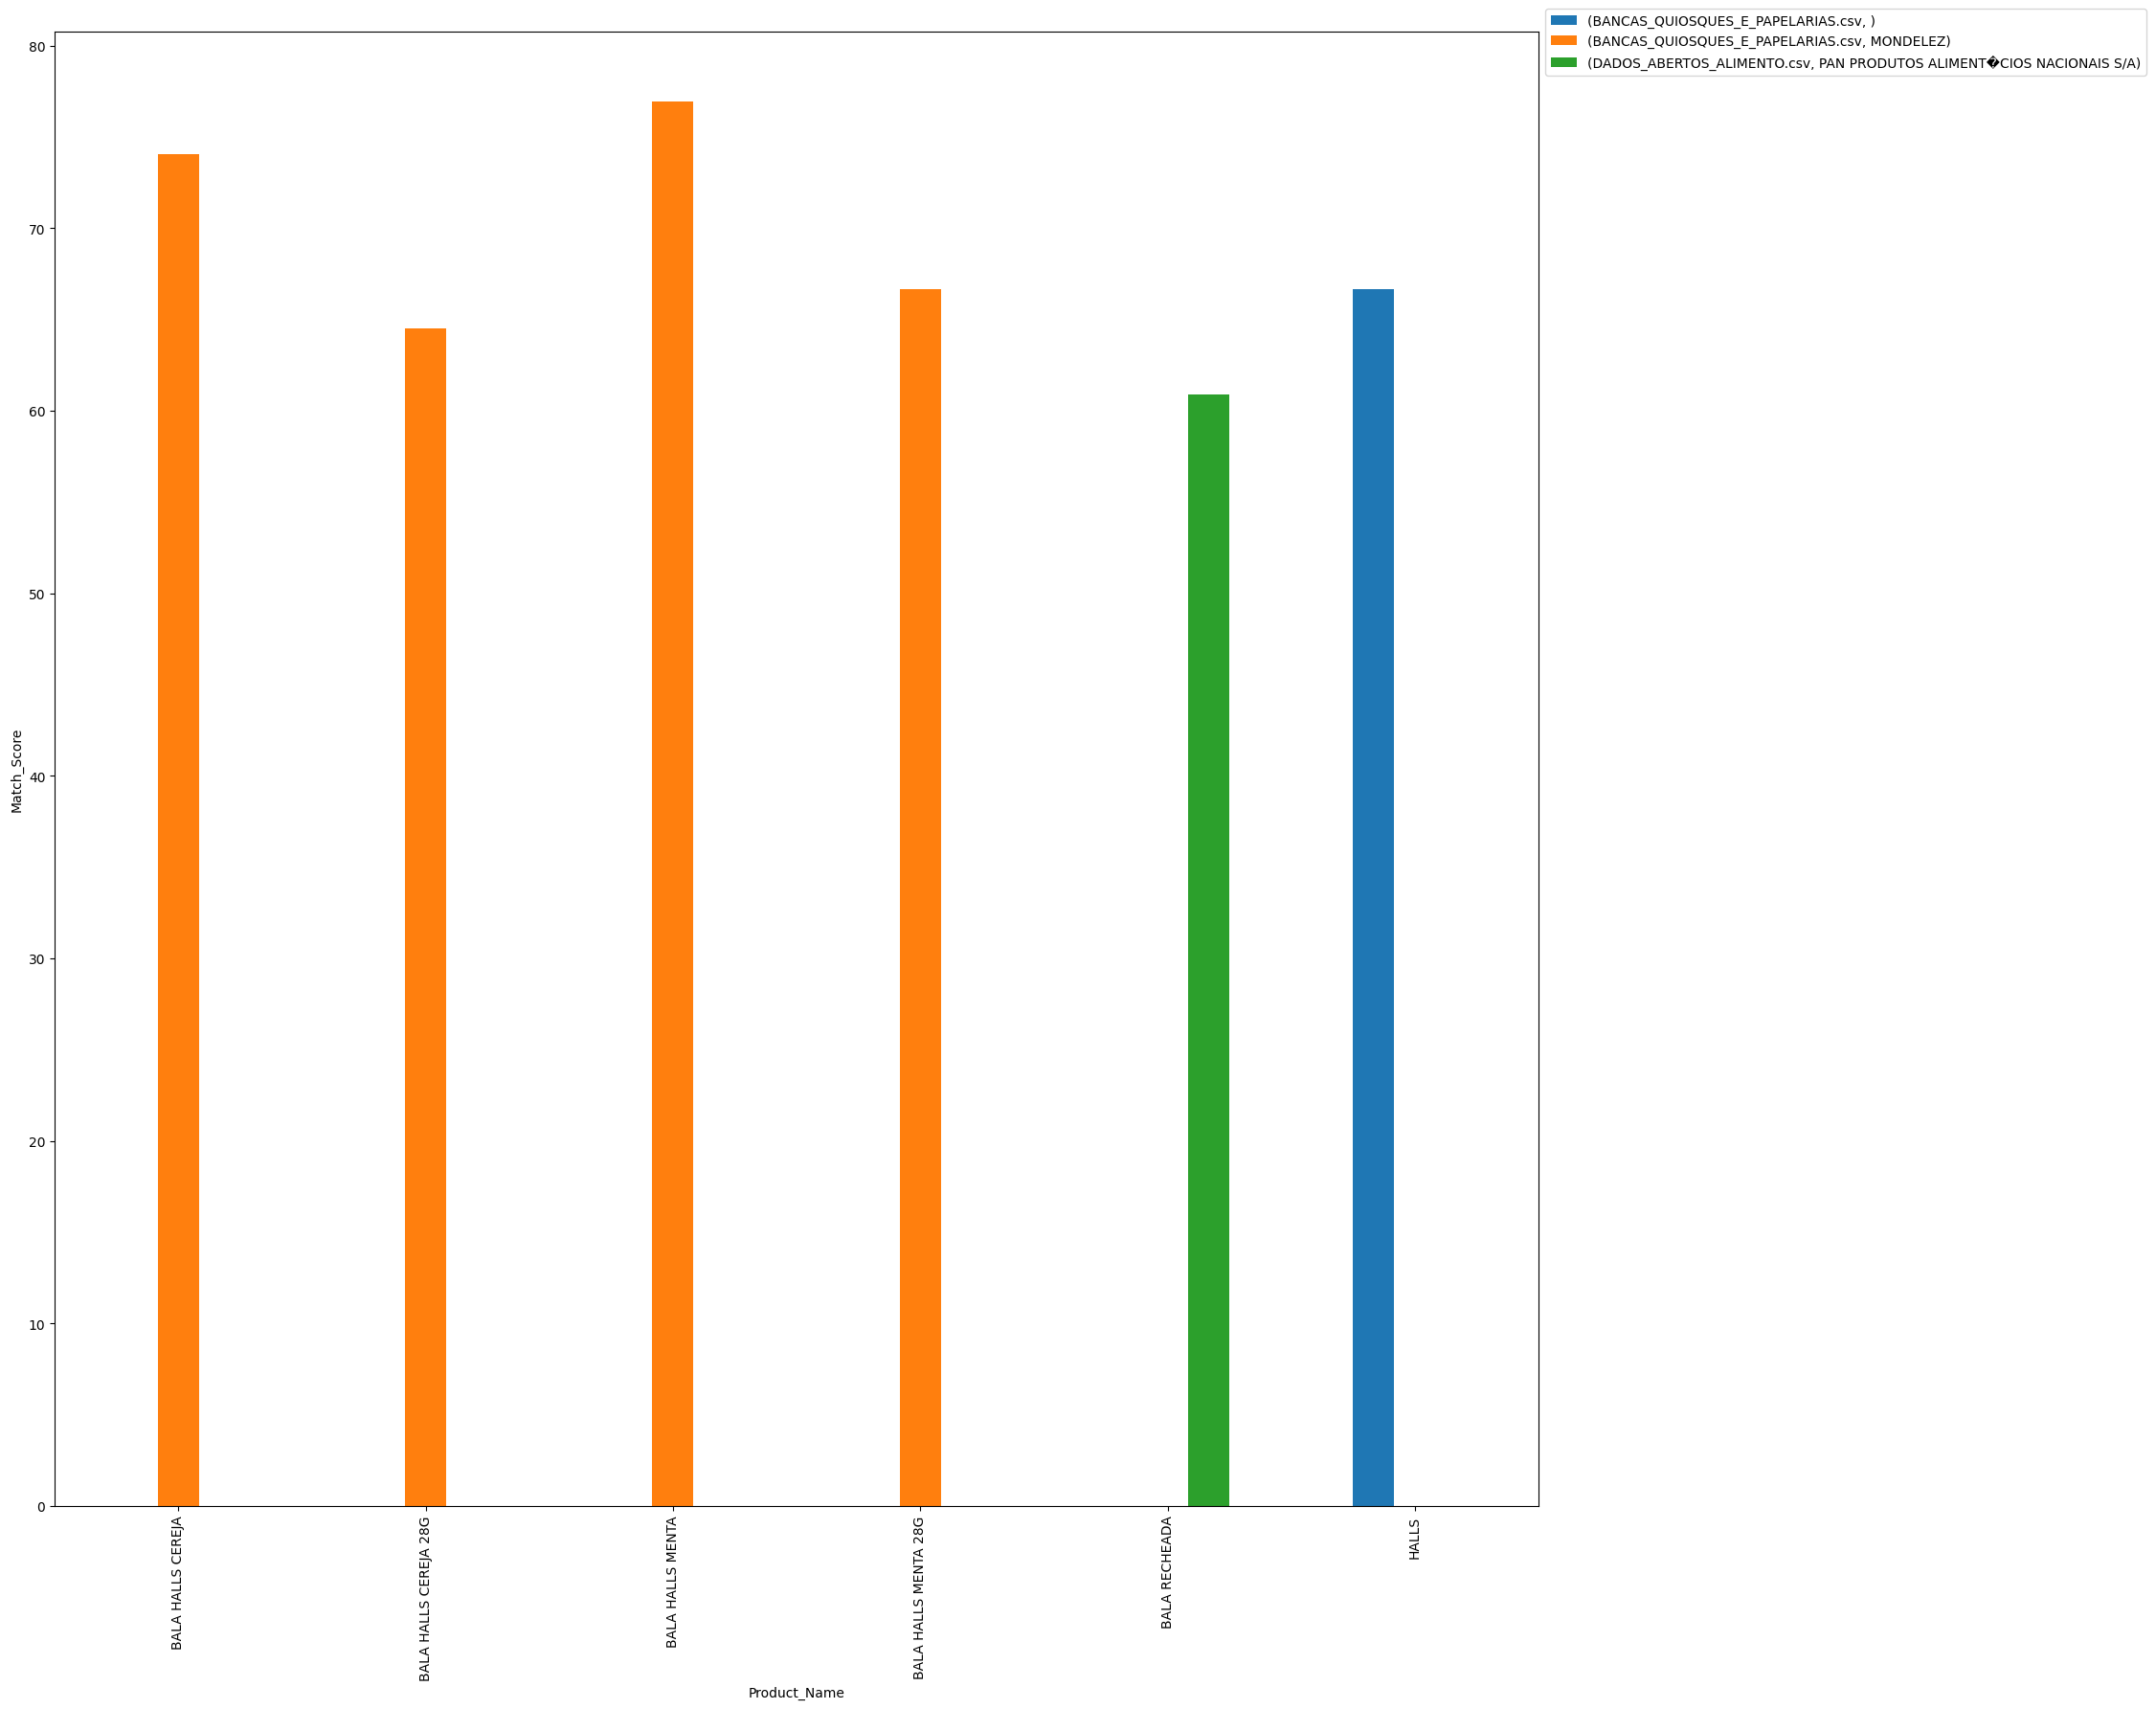

In [84]:
graphic_result = df_result_pivot.plot.bar(figsize=(20,20),align= "center")
graphic_result.set_ylabel("Match_Score")
graphic_result.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

Aqui exibimos em um gráfico de barras uma relação entre *Match_Score* e *Product_Name*, demonstrando a string encontrada e o score alcançado com a lógica fuzzy, além de na legenda termos o complemento de (*Searched_CSV*,*Brand*), isto é a marca do produto encontrado e o CSV em que ele foi encontrado, lembrando que nem sempre o produto dos CSVs terá uma marca definida, podendo vir no campo *Brand* um espaço vazio,

array([[<AxesSubplot: title={'center': '(BANCAS_QUIOSQUES_E_PAPELARIAS.csv, )'}, xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot: title={'center': '(BANCAS_QUIOSQUES_E_PAPELARIAS.csv, MONDELEZ)'}, xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot: title={'center': '(DADOS_ABERTOS_ALIMENTO.csv, PAN PRODUTOS ALIMENT�CIOS NACIONAIS S/A)'}, xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot: xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot: xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot: xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot: xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot: xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot: xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot: xlabel='Product_Name', ylabel='Match_Score'>],
       [<AxesSubplot: xlabel='Product_Name', ylabel='Match_Score'>,
        <AxesSubplot: xlabel='

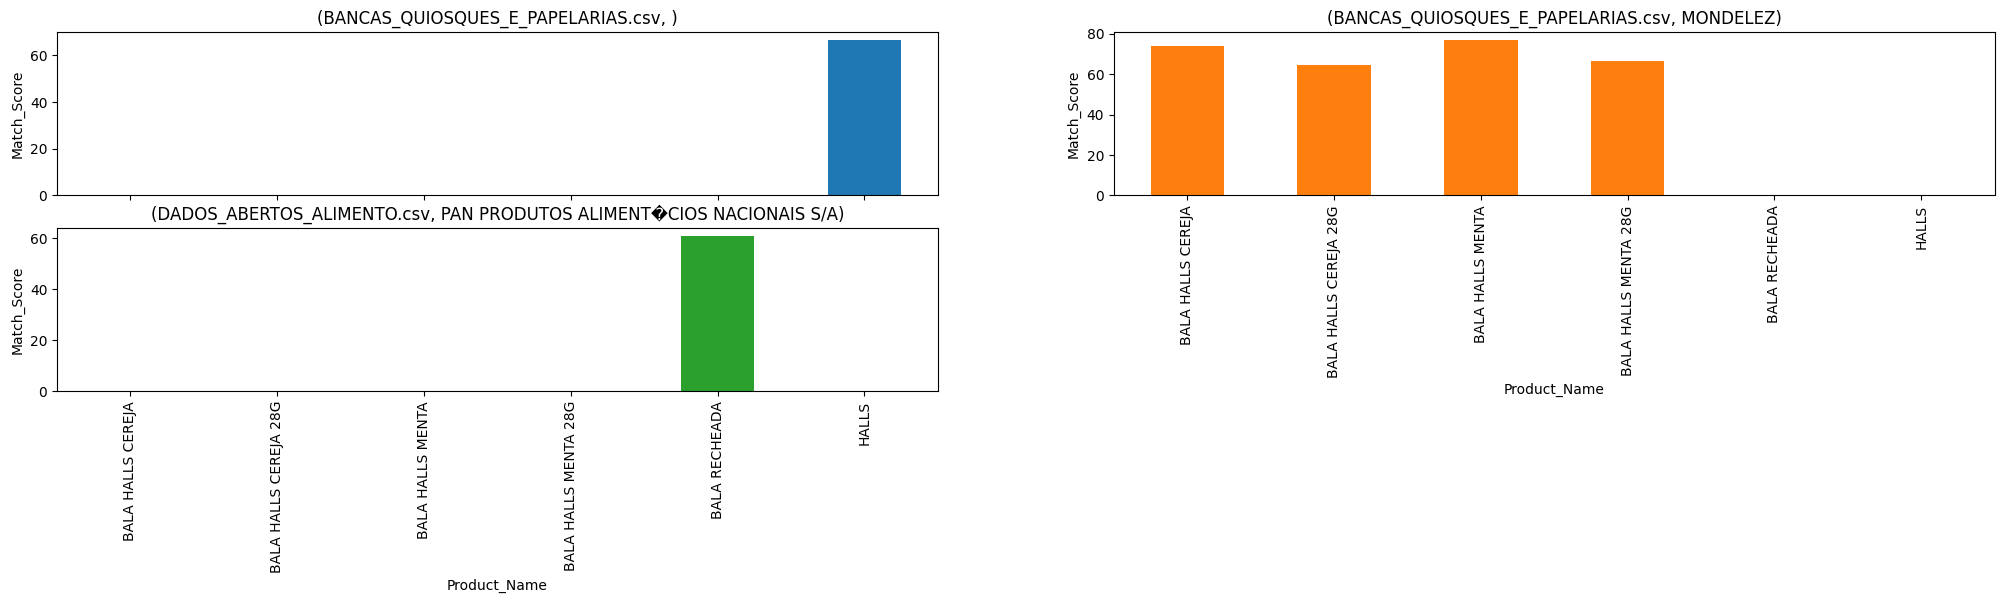

In [85]:
df_result_pivot.plot(kind='bar', subplots=True, figsize=(25, 25),layout=(10,2),legend=False,ylabel='Match_Score')

Aqui exibimos o mesmo resultado anterior porém agora demonstrando em gráficos separados em 2 colunas e também com separaçao por (*Searched_CSV*,*Brand*) como título.